# Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pysrt
!pip install textatistic
!pip install textstat
import textstat
from textstat.textstat import textstatistics
from textatistic import Textatistic
import pandas as pd
import zipfile
import os
import pysrt
from collections import defaultdict
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
from collections import Counter
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

!pip install sentence_transformers
from sentence_transformers import SentenceTransformer
from scipy import spatial

from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()
import spacy

from sklearn.metrics import cohen_kappa_score

!pip install nltk
import nltk
nltk.download('averaged_perceptron_tagger')

!pip install catboost
!pip install eli5
!pip install shap
import shap
import eli5
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import RFE, RFECV
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    ShuffleSplit,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import metrics
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    PolynomialFeatures,
    StandardScaler,
    MinMaxScaler
)
from sklearn.svm import SVC, SVR
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 104 kB 5.3 MB/s 
  Created wheel for pysrt: filename=pysrt-1.1.2-py3-none-any.whl size=13444 sha256=8cd10862000f13d28473cf85dffd43f94a6f912d0d0911c31fe5c4fbe230245c
  Stored in directory: /root/.cache/pip/wheels/b2/f8/e8/a26be4111ab5ec931e845777e574d1483b4adddc50d3e591a6
Successfully built pysrt
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 40 kB 4.3 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Created wheel for textatistic: filename=textatistic-0.0.1-py3-none-any.whl size=29068 sha256=ad862f6a8a360fc4f9042c3149f628e2f7823881ddb3e02b26eb2ef6a5058b68
  Stored in directory: /root/.cache/pip/wheels/58/4a/1a/5ed2a089cbd2f98693b07221c4ab499c8c446e15b6123ba4a4
  Created wheel for pyhyphen: filename=PyHyphen-4.0.3-cp37-abi3-linux_x86_64.whl size=

/usr/local/lib/python3.7/dist-packages/huggingface_hub/snapshot_download.py:11: FutureWarning: snapshot_download.py has been made private and will no longer be available from version 0.11. Please use `from huggingface_hub import snapshot_download` to import the only public function in this module. Other members of the file may be changed without a deprecation notice.
  FutureWarning,


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.1 MB/s 
     |████████████████████████████████| 133 kB 51.3 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=cea3c4d6eb7cf8f1cf4a39e8a2cc1300fd1002d90dd50939f60963de3f7ec83b
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.0 MB/s 


# mean and standard deviation cross validation function

In [3]:
# mean std cross validation function
# preprocesing and model
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

scoring_metrics = {
    "neg_mean_squared_error": "neg_mean_squared_error",
    "r2": "r2",
}

#read data + data cleaning

In [4]:
#read data + data cleaning
chapter_df = pd.read_csv("/content/drive/MyDrive/CFI/chapter_nps_df_120.csv", index_col = [0])
course_df = pd.read_csv("/content/drive/MyDrive/CFI/course_nps_df_120.csv", index_col = [0])


In [5]:
chapter_df = pd.read_csv("/content/drive/MyDrive/CFI/chapter_nps_df_120.csv", index_col = [0])

In [6]:
chapter_df[chapter_df['VideoLenght_x'] == 'Archive']

,CourseName,Transcript,Response_Q1,Duration,ChapterName,Chapter_count,word_count,sent_count,avg_sentence_length,avg_syllables_per_word,...,Program_x,Requirement_x,Level_x,VideoLenght_x,Price_x,Program_y,Requirement_y,Level_y,VideoLenght_y,Price_y
4170,ESG Integration & Financial Analysis,"Hi. I'm Kyle Peterdy. VP, Commercial Banking a...",8.705882,107.440,SRT files/ESG Integration _ Financial Analysis...,57,278,19,14.631579,1.7,...,ESG,Core,3,Archive,147.0,ESG,Core,3,Archive,147.0
4171,ESG Integration & Financial Analysis,Before we get into our ESG integration modelin...,8.705882,209.280,SRT files/ESG Integration _ Financial Analysis...,57,512,18,28.444444,1.7,...,ESG,Core,3,Archive,147.0,ESG,Core,3,Archive,147.0
4172,ESG Integration & Financial Analysis,As a company determines what types of ESG init...,8.705882,185.510,SRT files/ESG Integration _ Financial Analysis...,57,474,13,36.461538,1.7,...,ESG,Core,3,Archive,147.0,ESG,Core,3,Archive,147.0
4173,ESG Integration & Financial Analysis,ESG initiatives can impact a company's financi...,8.705882,82.000,SRT files/ESG Integration _ Financial Analysis...,57,225,11,20.454545,1.5,...,ESG,Core,3,Archive,147.0,ESG,Core,3,Archive,147.0
4174,ESG Integration & Financial Analysis,Time for an immersive of case study and some f...,8.705882,151.340,SRT files/ESG Integration _ Financial Analysis...,57,375,17,22.058824,1.6,...,ESG,Core,3,Archive,147.0,ESG,Core,3,Archive,147.0
4175,ESG Integration & Financial Analysis,The excerpt you've just read through from CPG'...,8.705882,112.916,SRT files/ESG Integration _ Financial Analysis...,57,337,8,42.125000,1.5,...,ESG,Core,3,Archive,147.0,ESG,Core,3,Archive,147.0
4176,ESG Integration & Financial Analysis,ESG initiative number one is a reduction of gr...,8.705882,107.320,SRT files/ESG Integration _ Financial Analysis...,57,285,13,21.923077,1.6,...,ESG,Core,3,Archive,147.0,ESG,Core,3,Archive,147.0
4177,ESG Integration & Financial Analysis,Let's give the financial model a quick overvie...,8.705882,219.305,SRT files/ESG Integration _ Financial Analysis...,57,577,17,33.941176,1.5,...,ESG,Core,3,Archive,147.0,ESG,Core,3,Archive,147.0
4178,ESG Integration & Financial Analysis,"Now, let's briefly walk through the completed ...",8.705882,192.340,SRT files/ESG Integration _ Financial Analysis...,57,574,16,35.875000,1.4,...,ESG,Core,3,Archive,147.0,ESG,Core,3,Archive,147.0
4179,ESG Integration & Financial Analysis,"Now, before we jump into the individual ESG in...",8.705882,159.200,SRT files/ESG Integration _ Financial Analysis...,57,436,21,20.761905,1.4,...,ESG,Core,3,Archive,147.0,ESG,Core,3,Archive,147.0


In [7]:
chapter_df = chapter_df[chapter_df.CourseName != 'ESG Integration & Financial Analysis']

# train test split, preprocessing, pipeline and model training

In [8]:
# chapter level 

# train test split
final_df = chapter_df.drop(columns=['CourseName','Transcript','Duration', 'ChapterName','Response_Q1', 'Program_y', 'Requirement_y', 'Level_y', 'VideoLenght_y', 'Price_y', 'Price_x'])
final_df.rename(columns = {'Program_x':'Program', 'Requirement_x':'Requirement', 
                           'Level_x':'Level', 'VideoLenght_x':'VideoLenght', 
                           'Price_x':'Price'}, inplace = True)
numeric_features = ['Chapter_count',
       'word_count', 'flesch_reading_ease', 'sent_count',
       'avg_sentence_length', 'avg_syllables_per_word', 'difficult_words',
       'verb_count', 'nnp_count', 'nn_count', 'adverb_count', 'ner_count',
       'gunning_fog', 'smog_index', 'dale_chall_readability_score',
       'avg_coherence', 'word_per_second']

categorical_features = [
    "Program",
    "Requirement"]

ordinal_features_oth = [
    "Level",
    "VideoLenght"
]

ordering_ordinal_oth = [
    [1, 2, 3, 4, 5],
    ['Under 1 hr', '1-2 hrs', '2-3 hrs', 'Over 3 hrs']
]

train_df, test_df = train_test_split(final_df, test_size = 0.15, random_state = 123)
X_train = train_df.drop(columns=["NPS_score"])
X_test = test_df.drop(columns=["NPS_score"])

y_train = train_df["NPS_score"]
y_test = test_df["NPS_score"]

# pipeline, models, results

from sklearn.impute import SimpleImputer

numeric_transformer = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())


ordinal_transformer_oth = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(categories=ordering_ordinal_oth),
)

categorical_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore", sparse=False),
)

results = {}
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (ordinal_transformer_oth, ordinal_features_oth),
    (categorical_transformer, categorical_features),
)
pipe_dummy = make_pipeline(preprocessor, DummyRegressor(strategy = 'mean'))
pipe_lr = make_pipeline(preprocessor, LinearRegression())
pipe_ridge = make_pipeline(preprocessor,Ridge())
pipe_dt = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=123))
pipe_rf = make_pipeline(preprocessor, RandomForestRegressor(random_state=123))
pipe_xgb = make_pipeline(preprocessor, XGBRegressor(random_state=123))
pipe_lgbm = make_pipeline(preprocessor, LGBMRegressor(random_state=123))
pipe_catboost = make_pipeline(
    preprocessor, CatBoostRegressor(verbose=0, random_state=123)
)

models = {
    "Dummy regressor": pipe_dummy,
    "Linear regression": pipe_lr,
    "Ridge regression": pipe_ridge,
    "Decision tree": pipe_dt,
    "random forest": pipe_rf,
    "XGBoost": pipe_xgb,
    "LightGBM": pipe_lgbm,
    "CatBoost": pipe_catboost,
}

for (name, model) in models.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True, scoring=scoring_metrics
    )

pd.DataFrame(results)

[03:33:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:33:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:33:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:33:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:33:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Dummy regressor,Linear regression,Ridge regression,Decision tree,random forest,XGBoost,LightGBM,CatBoost
fit_time,0.037 (+/- 0.008),0.081 (+/- 0.016),0.079 (+/- 0.041),0.112 (+/- 0.041),5.825 (+/- 1.491),0.507 (+/- 0.008),0.370 (+/- 0.013),4.349 (+/- 0.047)
score_time,0.014 (+/- 0.004),0.029 (+/- 0.009),0.030 (+/- 0.023),0.015 (+/- 0.006),0.067 (+/- 0.025),0.016 (+/- 0.002),0.020 (+/- 0.001),0.022 (+/- 0.000)
test_neg_mean_squared_error,-49.872 (+/- 2.946),-32.745 (+/- 1.250),-32.742 (+/- 1.265),-1.611 (+/- 0.398),-0.849 (+/- 0.252),-11.511 (+/- 0.914),-0.715 (+/- 0.144),-0.516 (+/- 0.092)
train_neg_mean_squared_error,-49.863 (+/- 0.736),-32.137 (+/- 0.315),-32.140 (+/- 0.315),-0.000 (+/- 0.000),-0.121 (+/- 0.009),-10.378 (+/- 1.124),-0.276 (+/- 0.022),-0.186 (+/- 0.009)
test_r2,-0.000 (+/- 0.000),0.342 (+/- 0.020),0.342 (+/- 0.020),0.968 (+/- 0.007),0.983 (+/- 0.005),0.769 (+/- 0.018),0.986 (+/- 0.003),0.990 (+/- 0.002)
train_r2,0.000 (+/- 0.000),0.355 (+/- 0.005),0.355 (+/- 0.005),1.000 (+/- 0.000),0.998 (+/- 0.000),0.792 (+/- 0.023),0.994 (+/- 0.000),0.996 (+/- 0.000)


# Feature importance of best performing model

In [9]:
# feature importance 
# catboost has the largest test neg mean squared error
pipe_catboost.fit(X_train, y_train)

# feature importance
#df_cols = list(final_df.columns) 
#rm_list = ['CourseName','Transcript','Duration', 'Response_Q1', 'Program_y', 'Requirement_y', 'Level_y', 'VideoLenght_y', 'Price_y']
ohe_columns = list(
    preprocessor.named_transformers_["pipeline-3"]
    .named_steps["onehotencoder"]
    .get_feature_names(categorical_features)
)
feature_list = numeric_features + ordinal_features_oth + ohe_columns

data = {
    "Importance":pipe_catboost.named_steps["catboostregressor"].feature_importances_
}



final_imp_df = pd.DataFrame(
    data=data,
    index=feature_list,
).sort_values(by="Importance", ascending=False)
print(final_imp_df)
# eli5
eli5.explain_weights(pipe_catboost.named_steps["catboostregressor"], feature_names=feature_list)

                              Importance
Chapter_count                  29.509811
Level                          21.096954
Requirement_Core               14.787128
VideoLenght                     8.651317
Program_FMVA                    6.469123
word_per_second                 5.371971
Program_CMSA                    3.958173
Requirement_Elective            3.446514
Program_CBCA                    2.083269
Program_ML                      0.916417
Program_BIDA                    0.557100
Requirement_Prep                0.439550
Program_BIDA, FMVA              0.313754
Program_CRE                     0.290022
Program_FPWMA                   0.241783
Program_ALL PROGRAMS            0.237872
gunning_fog                     0.165657
avg_sentence_length             0.150727
dale_chall_readability_score    0.144980
nnp_count                       0.129544
Requirement_Case Study          0.128082
avg_syllables_per_word          0.121337
ner_count                       0.114736
flesch_reading_e

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


Weight,Feature
0.2951,Chapter_count
0.2110,Level
0.1479,Requirement_Core
0.0865,VideoLenght
0.0647,Program_FMVA
0.0537,word_per_second
0.0396,Program_CMSA
0.0345,Requirement_Elective
0.0208,Program_CBCA
0.0092,Program_ML


# Shap summary plot and simplified summary plot

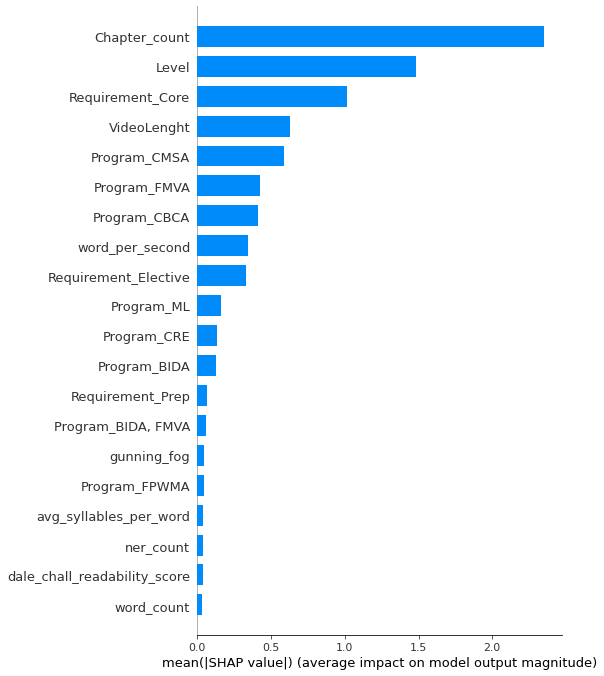

In [10]:
# shap for best model
X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=feature_list,
    index=X_train.index,
)


X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=feature_list,
    index=X_test.index,
)

rf_explainer = shap.TreeExplainer(pipe_catboost.named_steps["catboostregressor"])
train_rf_shap_values = rf_explainer.shap_values(X_train_enc)
test_rf_shap_values = rf_explainer.shap_values(X_test_enc)

# global feature importances
shap.summary_plot(train_rf_shap_values, X_train_enc, plot_type="bar")

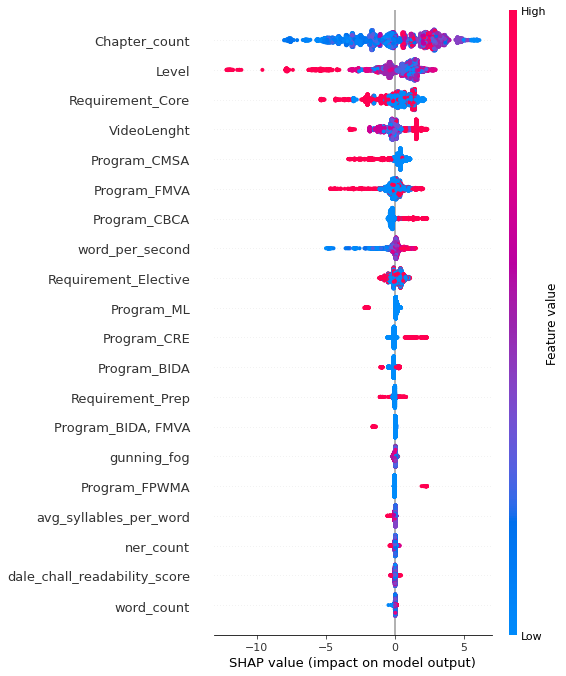

In [11]:
# summary plot
shap.summary_plot(train_rf_shap_values, X_train_enc)

invalid value encountered in true_divide
invalid value encountered in true_divide


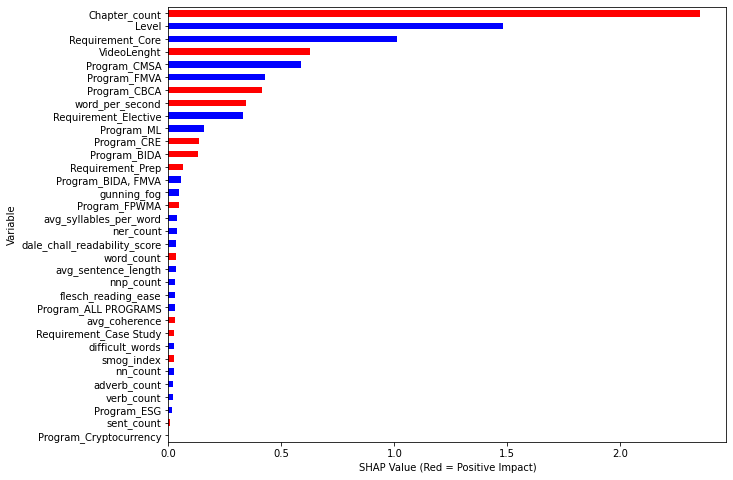

In [12]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(10,8),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(train_rf_shap_values,X_train_enc) 

# shap force plot for 2 data points

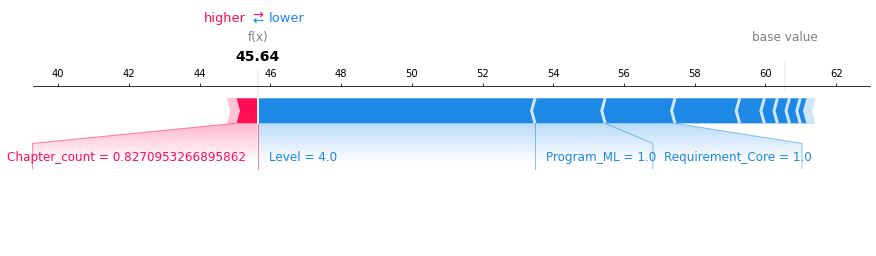

In [13]:
# shap plot 1
shap.force_plot(
    rf_explainer.expected_value,
    test_rf_shap_values[2],
    X_test_enc.iloc[2, :],
    matplotlib=True,
    figsize=(15, 3)
)

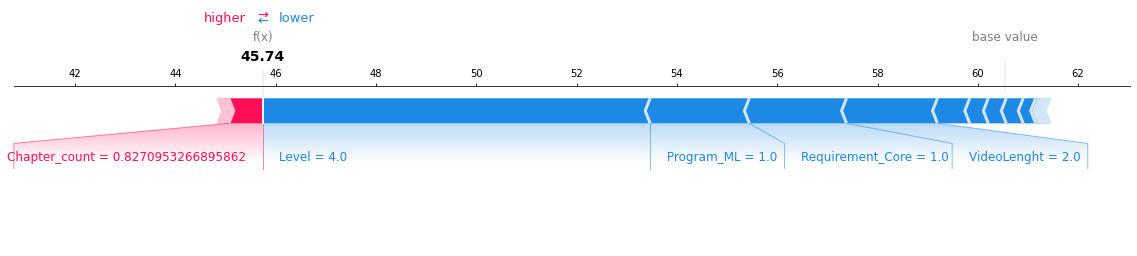

In [14]:
#shap plot 2
shap.force_plot(
    rf_explainer.expected_value,
    test_rf_shap_values[12],
    X_test_enc.iloc[12, :],
    matplotlib=True
)

# shap value and dependency plot

In [15]:
# average SHAP values associated with each feature
values = np.abs(train_rf_shap_values).mean(
    0
)
pd.DataFrame(data=values, index=feature_list, columns=["SHAP"]).sort_values(
    by="SHAP", ascending=False
)[:10]

,SHAP
Chapter_count,2.352780
Level,1.481291
Requirement_Core,1.011959
VideoLenght,0.626373
Program_CMSA,0.585680
Program_FMVA,0.425426
Program_CBCA,0.412131
word_per_second,0.343901
Requirement_Elective,0.331252
Program_ML,0.159563


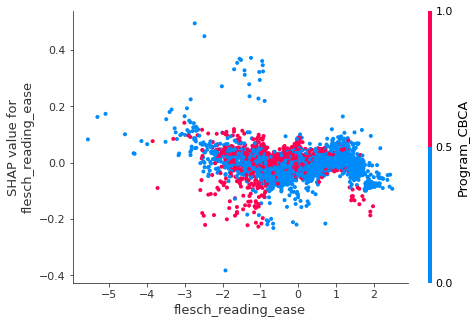

In [16]:
# dependence plot
shap.dependence_plot("flesch_reading_ease", train_rf_shap_values, X_train_enc)

# Final model performance on test data


In [17]:
# model test score
preds = pipe_catboost.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('neg RMSE:', -mean_squared_error(y_test, preds))
print('r2: ', r2_score(y_test, preds))


neg RMSE: -0.4509430952554715
r2:  0.9906843229016602
